In [73]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"

In [7]:
titanic_data = pd.read_csv('E:\\pyrhon\\progectTEST\\titanic\\train.csv')

In [8]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Первым делом необходимо проверить пропущенные значение(NaN), например пандовским методом isnull() - дас тасблицу с true/false.
Можно применить функцию sum() дл я подсчета кол-ва нанов по столбцам. Далее можно предположить какими значениями можно пренебречь.

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отберем самые очевидные переменные которые будем использовать для обучения и на них обучимся. Переменную Survived удаляем т к ее мы и хотим предсказывать.(axis = 1 указывает на то, что  переданный список, это название колонок)

In [10]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis =1)
y = titanic_data.Survived

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Теперь необходимо изменить наши строковые данные на числовые( например 0 ил 1) т к дерево не умеет работать с строками, будем использовать метод get_dummies.

In [12]:
X = pd.get_dummies(X) # передаем в параметры датафрейм и метод сам меняет все строковые значения на числовые

Можно догадаться, что от значений типа NaN тоже необходимо избавиться. Заполним пропущенные значения медианным значением возраста( столбец age)

In [13]:
X = X.fillna({'Age':X.Age.median()}) # Считаем медиану по столбцу Age X.Age.median() и сразу передаем в метод fillna,который заменит все NaN  

In [14]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
X.isnull().sum() # Проверяем остались ли пропущенные значения 

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Далее строим дерево деревьев с помощью tree.DecisionTreeClassfier

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy') # Переменная - дерево, РАБОТАЕТ ТОЛЬКО С ЧИСЛОВЫМИ ДАННЫМИ
# criterion = 'entropy' указывает, что исмпользуем ентропию для обучения деревьев

In [17]:
clf.fit(X,y) # Используем метод fit 

DecisionTreeClassifier(criterion='entropy')

Строим граф и наблюдаем овер фитинг(переобучение), модель уменьшала энтропию до последнее, вместо нахождения закономерностей.
Потому что мы сказали нашей модели: Вот тебе датафрейм, вот тебе "у"  и сделай такое дерево решений, которое безошибочно классифицирует все наблюдения в нашем датафрейме.

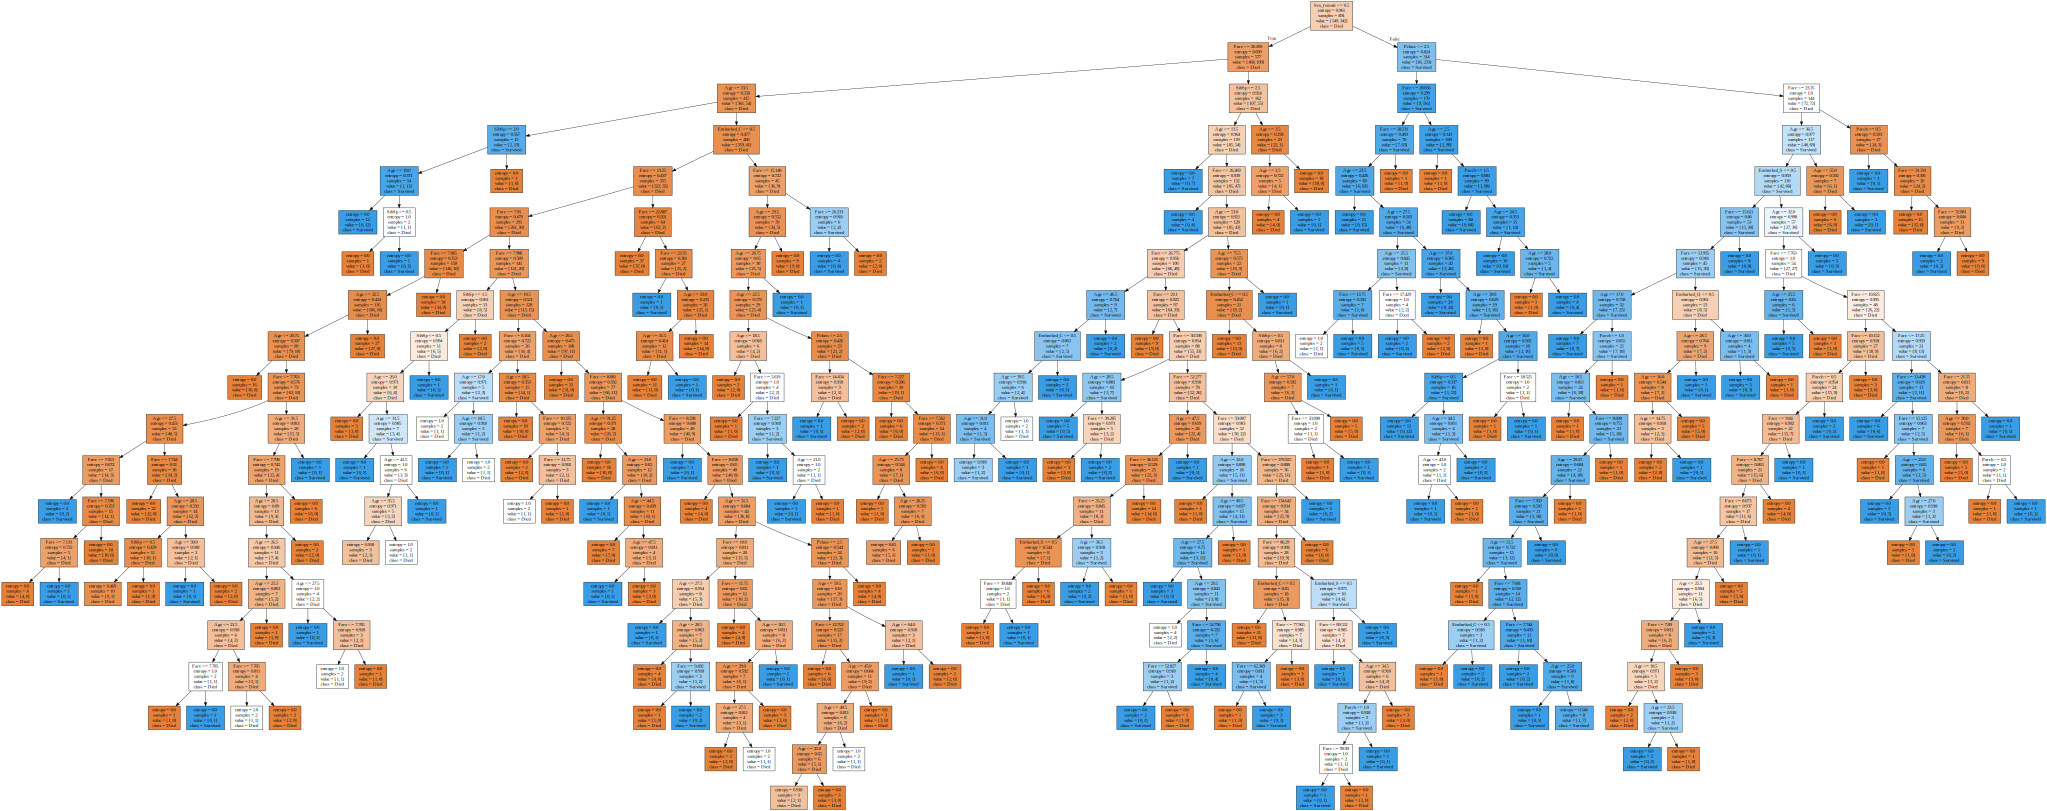

In [18]:
graph = Source(tree.export_graphviz(clf, out_file = None,
                                   feature_names = list(X),
                                   class_names = ['Died','Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

Существует два выхода из данной ситуации: 1. Ограничить наше дерево в его потребности рости как можно лучше. 2.Показывать нашему дереву два набора данных, для "тестирования". Для этого нам потребуется train_test_split

In [19]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
#Данная функция получает на вход датафрейм Х с фичами датафрейм у и разбивает их в пропорции 0.33
#( 33 процента составит тестовое множество от наших наблюдений, а  67 будут использоваться в обучении ).
# Функция возвращает 4 значения( разбитое множество значений и разбитое множество фичей).

In [21]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [22]:
X_train.shape

(596, 10)

In [23]:
X_test.shape

(295, 10)

Метод классификации scope самый простой показатель качества модели (число правильных ответов)

In [24]:
clf.score(X,y) # показатель правильных ответов

0.9797979797979798

Теперь обучим наш класификатор на X_train and y_train

In [25]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
clf.score(X_train,y_train) # показатель правильных ответов

0.9798657718120806

Обучим на тестовых данных, которых классификатор еще е видел

In [27]:
clf.score(X_test,y_test) # показатель правильных ответов

0.7661016949152543

Видим, что тестовые данные приносят худший результат, попробуем ограничить глубину дерева (max_depth = 5)

In [28]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [29]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
clf.score(X_train,y_train) # на traun классификатор стал работать хуже

0.8238255033557047

In [31]:
clf.score(X_test,y_test) # на данных которые он не видел,класс-р стал работать лучше

0.8203389830508474

Протестируем различные max_depth используя цикл

In [32]:
max_depth_values = range(1,100) #создаем переменную для цикла, глубина дерева не равна 0
scores_data = pd.DataFrame() #создем пустой датафрей куда будем заносить полученне в цикле значения

In [33]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth) #классификатор
    clf.fit(X_train,y_train) #обучение на трейне
    train_score = clf.score(X_train,y_train) # показатель правильных ответов тна трейне
    test_score = clf.score(X_test,y_test)  # показатель правильных ответов на тесте
    # далее в нутри цикла создадим дата фрейм со столбцами max_depth,train_score,test_score
    
    tepm_score_data = pd.DataFrame({'max_depth': [max_depth],'train_score':[train_score],'test_score':[test_score]})
    
    # теперь занесем tepm_score_data в основной датафрейм scores_data
    scores_data = scores_data.append(tepm_score_data)

In [34]:
scores_data.head()  # получили результат обучения с глубиной от 1 до 100

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


Изменим таблицу с помощью метода melt

In [35]:
scores_data_long = pd.melt(scores_data, id_vars =['max_depth'], value_vars = ['train_score','test_score'],
                           var_name = 'set_type', value_name = 'score')

In [36]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


Визуализируем получившиеся значения

<AxesSubplot:xlabel='max_depth', ylabel='score'>

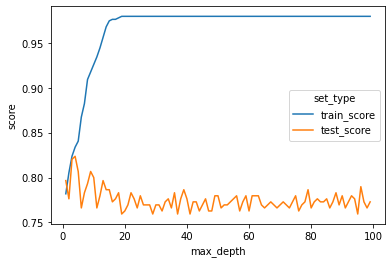

In [37]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data= scores_data_long)

Вывод:  1. чем глубже мы даем нашему дереву расте, тем лучше показатель на trai_score.
    2.test_score наоборот, значения лучше на меньшем углублении дерева

Чтобы не переобучить дерево нужно применить кросс валидацию. Сначала делим данные на дата трейн и дата тест.
Потом дата трей  сплитим на кусочки и при каждом сплите меняем тестовую часть данных(кусочек).

In [38]:
#импортируем cross_val_score
from sklearn.model_selection import cross_val_score
#пересоздадим классификатор
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 4 )

In [39]:
#далее передадим наш классификатор в cross_val_score,  передадим X_train и cv = 5( на сколько фолдов разбить )
cross_val_score(clf, X_train, y_train, cv = 5)
#Результатом будет 5 значений точности разбив весь наш X_train и y_train на 5 кусочков 
#и  сначала обучился на первых 4 и предсказал 5, потом обучился на всех - предсказал 4, потом предсказал 3 и т д.

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

Узнаем среднее значение точности

In [40]:
cross_val_score(clf, X_train, y_train, cv = 5).mean() # mean cross validation

0.7886274509803922

Изменим наш цикл с учетом кросс валидации

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth) #классификатор
    clf.fit(X_train,y_train) #обучение на трейне
    train_score = clf.score(X_train,y_train) # показатель правильных ответов тна трейне
    test_score = clf.score(X_test,y_test)  # показатель правильных ответов на тесте
    # далее в нутри цикла создадим дата фрейм со столбцами max_depth,train_score,test_score
    
    #создадим переменную ккоторая считает среднее значение точногсти при сплите
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    #создадим датафрейм внутри цикла, которой потом добавим в основной
    tepm_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    # теперь занесем tepm_score_data в основной датафрейм scores_data
    scores_data = scores_data.append(tepm_score_data)

In [42]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,NaN
0,2,0.805369,0.776271,NaN
0,3,0.823826,0.820339,NaN
0,4,0.833893,0.823729,NaN
0,5,0.840604,0.806780,NaN
...,...,...,...,...
0,95,0.979866,0.776271,0.765140
0,96,0.979866,0.769492,0.761765
0,97,0.979866,0.769492,0.771877
0,98,0.979866,0.772881,0.761779


In [43]:
scores_data_long = pd.melt(scores_data, id_vars =['max_depth'], value_vars = ['train_score','test_score','cross_val_score'],
                           var_name = 'set_type', value_name = 'score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

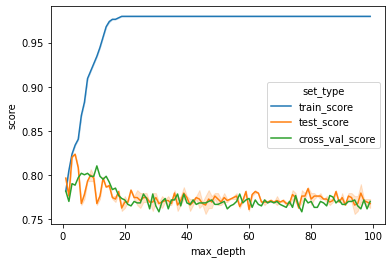

In [44]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data= scores_data_long)

Посмотрим на максимально значение и узнаем max_depth при котором показывает лучшее качество

In [45]:
scores_data_long.query("set_type == 'cross_val_score'").max()

max_depth                 99
set_type     cross_val_score
score               0.810434
dtype: object

Протестиреум на тестовых значениях

In [46]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 99) # создаем классификатор
best_clf.fit(X_train, y_train) #тестируем на тренировочных
best_clf.score(X_test, y_test) #смотрим значение на тестовых

0.7762711864406779

ПЕРЕБЕРЕМ ПАРАМЕТРЫ,ЧТОБЫ ВЫЧИСЛИТЬ КАКИЕ ЛУЧШЕ ПОДХОДЯ ДЛЯ РЕШЕНИЯ ЗАДАЧИ

GridSearchCV - тестирует все переданные параметры на определенном классификаторе и выдает наилучшее сочетание пар-ов, с учетом кросс валидации.
GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf = tree.DecisionTreeClassifier()
# создадим пустойклассификатор, а параметры передадим отдельно в GridSearchCV

In [49]:
#создадим  словарь с параметрами, которые требуется перебрать и протестить в GridSearchCV
parametrs = {'criterion':['gini','entropy'], 'max_depth': range(1,100)}

In [50]:
#тестируем параметры и передадим характеристики кроссвалидации(CV=5)
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv=5)

In [51]:
#обучимся на тестовых данных 
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [52]:
#выведем лучшие параметры, где accuracy лучше
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [53]:
#теперь создадим эталлонный классификатор с лучшими параметрами, он уже сохранен как best_estimator_
best_clf = grid_search_cv_clf.best_estimator_

In [54]:
#посмотрим score на тестовых данных
best_clf.score(X_test,y_test)

0.8067796610169492

In [55]:
#Рассчитаем precision и recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Для precision надо передать реальное значение у и предсказанное
#y_pred  это предсказанное значение best_clf по тестовым данным
y_pred = best_clf.predict(X_test)


In [56]:
precision_score(y_test,y_pred)

0.8387096774193549

In [57]:
recall_score(y_test,y_pred)

0.65

In [58]:
#посмотрим что на самом деле хранится в предсказаниях нашего дерева(предсказанная вероятность отнесения к оденому из двух классов)
#узнаем вероятность отнесения пассажира к каждому классу
y_predicted_prob = best_clf.predict_proba(X_test) # результат - массив предсказанных значения для каждого пассажира

In [59]:
y_predicted_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot:>

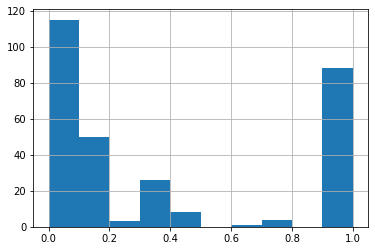

In [60]:
#отберем только вторую колонку - отнесение к положительному классу
y_predicted_prob[:, 1]
#Чтобы посторить гистограмму, необходимо обернуть массив в пандовскую серию
pd.Series(y_predicted_prob[:, 1]).hist()

In [61]:
#предоставим полученные данные в формате 0 или 1,если значение больше 0.8
# если y_predicted_prob[:, 1] больше 0.8, то 1, иначе 0
y_pred2 = np.where(y_predicted_prob[:, 1]>0.8, 1, 0)

In [62]:
precision_score(y_test,y_pred2)

0.8522727272727273

In [63]:
recall_score(y_test,y_pred2)

0.625

Построим ROC кривую, которая позволяет найти оптимальные precision и recall

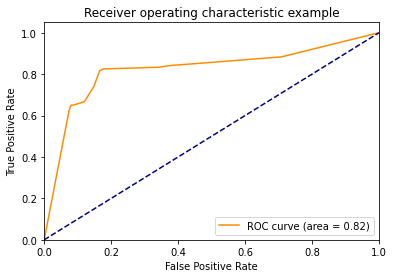

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange'
        , label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [70]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 100)

In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

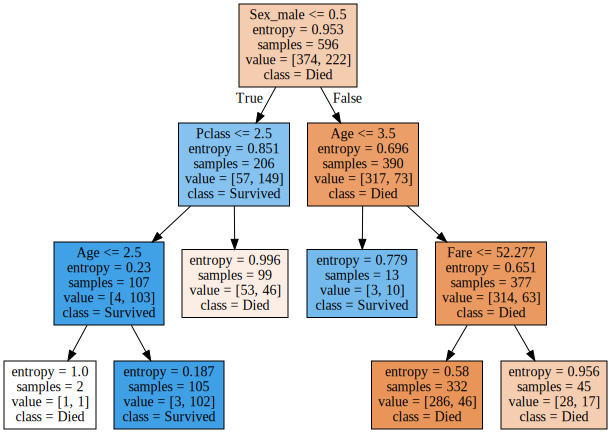

In [72]:
graph = Source(tree.export_graphviz(clf, out_file = None, feature_names = list(X), class_names=['Died','Survived'], filled = True))

display(SVG(graph.pipe(format = 'svg')))

In [85]:
clf_rf =  RandomForestClassifier()

In [91]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [95]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5)

In [96]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [97]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [98]:
best_clf = grid_search_cv_clf.best_estimator_

In [99]:
best_clf.score(X_test, y_test)

0.8271186440677966

In [101]:
feature_importances = best_clf.feature_importances_

In [105]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [110]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.256052
6,Sex_male,0.244695
0,Pclass,0.144257
4,Fare,0.126624
1,Age,0.105154
2,SibSp,0.036209
3,Parch,0.033236
9,Embarked_S,0.029707
7,Embarked_C,0.013979
8,Embarked_Q,0.010087
